In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
data=pd.read_csv("titanic_dataset.csv")

In [305]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [306]:
data=data.set_index("PassengerId")

In [307]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [309]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [310]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [311]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [312]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [313]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [314]:
data["Cabin"]=data["Cabin"].fillna(data["Cabin"].mode()[0])

In [315]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [316]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Fare')

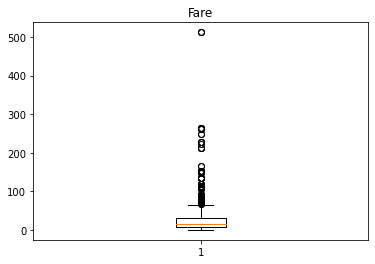

In [317]:
plt.boxplot(data["Fare"])
plt.title("Fare")

In [318]:
Q1= np.percentile(data["Fare"],25,interpolation="midpoint")
Q2= np.percentile(data["Fare"],50,interpolation="midpoint")
Q3= np.percentile(data["Fare"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 7.9104 

Q2: 14.4542 

Q3: 31.0 



In [319]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 23.0896 



In [320]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: -26.724 

upper_limit: 65.6344 



In [321]:
outlier=[]
for x in data["Fare"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [322]:
ind1=data["Fare"]>upper_limit
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [323]:
data['Fare']=np.where(data['Fare']>upper_limit,upper_limit,np.where(data['Fare']<low_limit,low_limit,data['Fare']))

Text(0.5, 1.0, 'Fare after removing outliers')

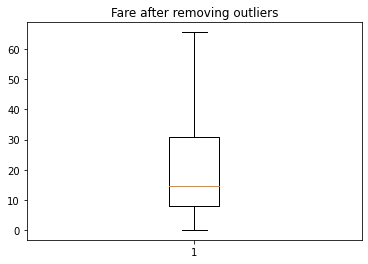

In [324]:
plt.boxplot(data["Fare"])
plt.title("Fare after removing outliers")

#checking outliers in age

Text(0.5, 1.0, 'Box plot of Age')

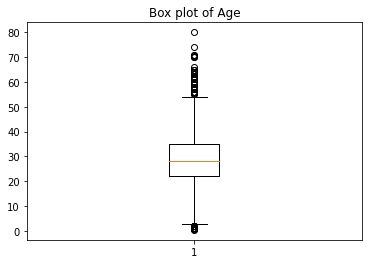

In [325]:
plt.boxplot(data["Age"])
plt.title("Box plot of Age")

In [326]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [327]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 13.0 



In [328]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

2.5
54.5


In [329]:
outlier=[]
for x in data["Age"]:
    if((x<low_limit)or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [330]:
ind1=data['Age']<low_limit
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [331]:
data['Age']=np.where(data['Age']>up_limit,up_limit,np.where(data['Age']<low_limit,low_limit,data['Age']))

Text(0.5, 1.0, 'Box plot of Age ')

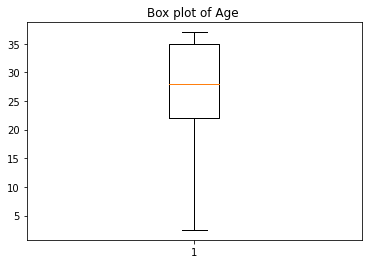

In [332]:
plt.boxplot(data["Age"])
plt.title("Box plot of Age ")

In [333]:
#checking outliers in SibSp

Text(0.5, 1.0, 'Box plot of SibSp ')

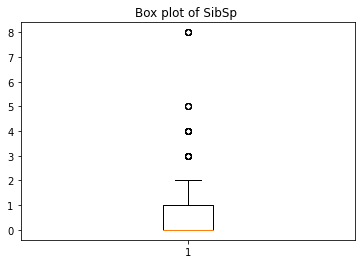

In [334]:
plt.boxplot(data["SibSp"])
plt.title("Box plot of SibSp ")

In [335]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [336]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 1.0 



In [337]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-1.5
2.5


In [338]:
outlier=[]
for x in data["SibSp"]:
    if((x<low_limit)or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [341]:
data['SibSp']=np.where(data['SibSp']>upper_limit,upper_limit,np.where(data['SibSp']<low_limit,low_limit,data['SibSp']))

Text(0.5, 1.0, 'Box plot of SibSp ')

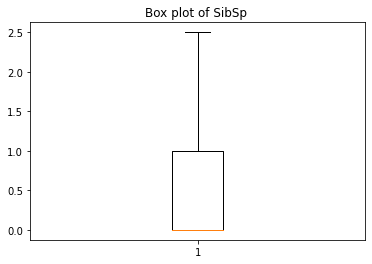

In [342]:
plt.boxplot(data["SibSp"])
plt.title("Box plot of SibSp ")

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [360]:
data=pd.get_dummies(data)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,37.0,1.0,0,65.6344,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,26.0,0.0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1.0,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0.0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0.0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0.0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,0,3,28.0,1.0,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [361]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [362]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [364]:
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.1210584489485188
R squared value is: 0.5007935955264491


In [365]:
type(x)

pandas.core.frame.DataFrame

In [366]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [367]:
x=min_max.fit_transform(x)

In [368]:
x=pd.DataFrame(x)

In [369]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.708323,0.170595,0.063599,0.366375,0.001122,0.001122,0.001122,0.001122,0.001122,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.725028
std,0.418036,0.258606,0.283298,0.134343,0.312056,0.033501,0.033501,0.033501,0.033501,0.033501,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.565217,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.739130,0.000000,0.000000,0.220223,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.942029,0.400000,0.000000,0.472313,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.12317378410187527
R squared value is: 0.49207062851889505


In [ ]:
min max scaling does not affect the dataset